In [1]:
%load_ext autoreload
%autoreload 2
from imports import *

In [26]:
data_ = 'data/'
ztf = Table.read(data_+"nph_light_curves?POS=CIRCLE 286.49621 16.098028 0.00055")

kwargs = {'format': 'ascii', 'names': ['t', 'mag', 'magerr', 'filt']}
ogle = Table.read(data_+"OGLE-GD-CEP-1442-I.dat", **kwargs)


ztf = ztf[ztf['oid']!=1585209400010477]
    
ztf['t'] = ztf['hjd']-2450000 - ztf['exptime']*0.5/(24*60*60)
ztf['filt'] = list(map(str, ztf['filtercode'].data))

df = vstack([ogle, ztf])
df = df.to_pandas()
df = df[['t','mag','magerr','filt']]
df['phase'] = (df['t']/3.27)% 1
df.to_csv(data_+'testing_MC.csv')
df.groupby('filt').count()


/home/ktisanic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'oid' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ktisanic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'expid' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ktisanic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'catflags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ktisanic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'filefracday' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ktisanic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: TableReplaceWarning: converted column 'field' from in

,t,mag,magerr,phase
filt,,,,
I,69,69,69,69
b'zg',200,200,200,200
b'zr',225,225,225,225


In [ ]:
%run simcodes/MultiBandSim.py
Sim = MCSimulation('data/', 3.27, 'data/testing_MC.csv')
cluster = SSHCluster(
                ["dodo1","dodo2","dodo4", "dodo5", "dodo6", "dodo7"],
                connect_options={"known_hosts": None},
                scheduler_options={"port": 0, "dashboard_address": ":8797"}
            )
%timeit Sim.run_simulation('fast', np.arange(5,50,10),10,cluster=cluster)
%timeit Sim.run_simulation('fast', np.arange(5,50,10),10)
%timeit Sim.run_simulation('slow', np.arange(5,50,10),10,cluster=cluster)


distributed.deploy.ssh - INFO - distributed.scheduler - INFO - -----------------------------------------------
distributed.deploy.ssh - INFO - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
distributed.deploy.ssh - INFO - /home/ktisanic/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8797 is already in use.
distributed.deploy.ssh - INFO - Perhaps you already have a cluster running?
distributed.deploy.ssh - INFO - Hosting the HTTP server on port 35889 instead
distributed.deploy.ssh - INFO - warnings.warn(
distributed.deploy.ssh - INFO - distributed.scheduler - INFO - -----------------------------------------------
distributed.deploy.ssh - INFO - distributed.scheduler - INFO - Clear task state
distributed.deploy.ssh - INFO - distributed.scheduler - INFO -   Scheduler at: tcp://192.168.200.103:39383
distributed.deploy.ssh - INFO - distributed.nanny -

34.3 s ± 770 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 13s ± 858 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3min 12s ± 11.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
pd.unique(df['filt'])

array(['I', "b'zg'", "b'zr'"], dtype=object)

#  Lomb Scargle Fast

In [ ]:
%run simcodes/MultiBandSim.py
Sim = MCSimulation('data/', 3.27, 'data/testing_MC.csv')
cluster = SSHCluster(
                ["dodo1","dodo2","dodo4", "dodo5", "dodo6", "dodo7"],
                connect_options={"known_hosts": None},
                scheduler_options={"port": 0, "dashboard_address": ":8797"}
            )
sims=np.append(np.arange(5,20),np.arange(20,101,5))
Sim.produce_bootstrap(sims,300)
Sim.run_simulation('fast', cluster=cluster)
Sim.save_simulations('outputs/')
#Sim.run_simulation('slow', cluster=cluster)
#Sim.save_simulations('outputs/')

,p_16,p_50,p_84,max,min,sem,skewness,std
N,,,,,,,,
5,0.104691,0.116190,0.158904,0.336294,0.100344,0.003852,2.670263,0.038324
10,0.263857,3.269645,3.271239,6.513623,0.104449,0.143334,-0.272322,1.426159
15,3.268765,3.270218,3.271090,3.274714,0.149713,0.076166,-2.556882,0.757844
20,3.269491,3.270225,3.270744,3.272075,0.764148,0.055149,-3.522796,0.548726
25,3.270077,3.270317,3.271027,3.272685,1.434609,0.036154,-4.694835,0.359732
30,3.270126,3.270316,3.270997,3.272047,1.434838,0.018356,-9.849206,0.182643
35,3.270147,3.270311,3.270824,3.271986,3.269256,0.000046,1.134304,0.000459
40,3.270164,3.270277,3.270630,3.271843,3.268104,0.000044,-0.644169,0.000442
45,3.270156,3.270265,3.270500,3.271752,3.269955,0.000032,2.386660,0.000317


No handles with labels found to put in legend.


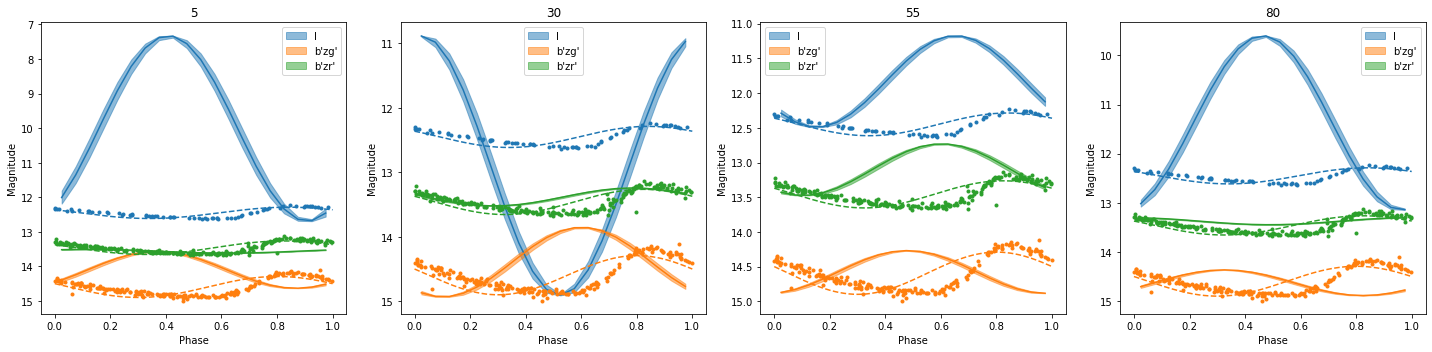

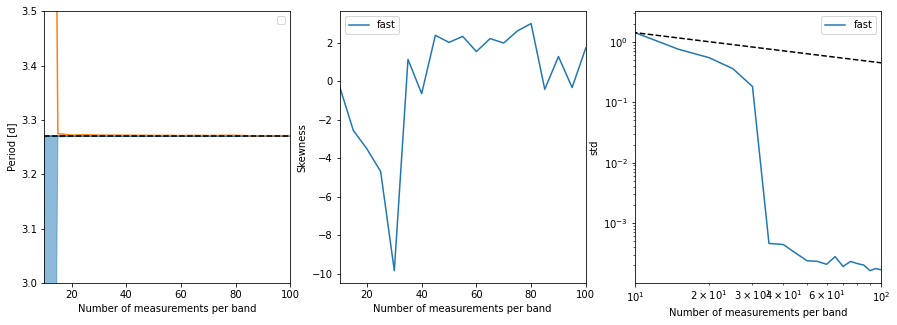

In [24]:
%run simcodes/MultiBandSim.py
Sim = MCSimulation('data/', 3.27, 'data/testing_MC.csv')
Sim.load_simulations('outputs/')
fig=plot_lightcurve(Sim.lightcurve_p['fast'],Sim.best_fitting,df).savefig('outputs/lc.pdf')
periods(Sim.simulated_periods['fast'],3.27,'fast')[0].savefig('outputs/periods.pdf')

# Windowing

In [187]:
Sim = MCSimulation('data/', 3.27, 'data/testing_MC.csv')
Sim.load_simulations('outputs/')

In [ ]:
%run simcodes/MultiBandSim.py

Sim0 = MCSimulation('data/', 3.27, 'data/testing_MC.csv')
Sim0.load_simulations('outputs/')
DF = Sim0.bootstrap_samples['fast']
sims=np.arange(5,100,10)
Widths = np.round(np.logspace(-3,np.log10(0.4),10),3)
for w in Widths:
        try:
            os.mkdir(f'outputs/windows/w_{w}/')
        except:
            pass
#Successful = []
cluster = SSHCluster(
                ["dodo1","dodo2","dodo4", "dodo5", "dodo6", "dodo7"],
                connect_options={"known_hosts": None},
                scheduler_options={"port": 0, "dashboard_address": ":8797"}
            )
for run,P in zip(Sim0.Simulated_periods.index[200:500],Sim0.Simulated_periods['P'][200:500]):
    cut = Sim0.bootstrap_samples['fast']['run']==run
    df = Sim0.bootstrap_samples['fast'][cut]
    df.loc[:,'phase'] = (df['t']/P)% 1
    df.to_csv(f'outputs/runs/run_{run}.csv')
    Sim = MCSimulation(f'outputs/runs/', P, f'outputs/runs/run_{run}.csv')
    
    for w in Widths:
        tries = 0
        
        while tries<3:
            try:
                    Sim.produce_bootstrap(sims,10)
                    Sim.remove_window(0.5,w)
                    Sim.run_simulation('fast', cluster=cluster)
                    Sim.save_simulations(f'outputs/windows/w_{w}/run_{run}')
                    tries=5
                    print('OK')
                    Successful=pd.concat([Successful,pd.DataFrame({'run':[run],'w':[w],'P':[P]})]).reset_index()
                    #Successful.append({'run':run,'w':w,'P':P})
                    Successful.to_csv('Successful.csv')
                    
            except:
                tries = tries+1
                print('Try', tries, 'w=',w)

distributed.deploy.ssh - INFO - distributed.scheduler - INFO - -----------------------------------------------
distributed.deploy.ssh - INFO - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
distributed.deploy.ssh - INFO - /home/ktisanic/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8797 is already in use.
distributed.deploy.ssh - INFO - Perhaps you already have a cluster running?
distributed.deploy.ssh - INFO - Hosting the HTTP server on port 39423 instead
distributed.deploy.ssh - INFO - warnings.warn(
distributed.deploy.ssh - INFO - distributed.scheduler - INFO - -----------------------------------------------
distributed.deploy.ssh - INFO - distributed.scheduler - INFO - Clear task state
distributed.deploy.ssh - INFO - distributed.scheduler - INFO -   Scheduler at: tcp://192.168.200.104:38015
distributed.deploy.ssh - INFO - distributed.nanny -

OK
Try 6 w= 0.001
OK
Try 6 w= 0.002
OK
Try 6 w= 0.004
OK
Try 6 w= 0.007
OK
Try 6 w= 0.014
OK
Try 6 w= 0.028
Try 1 w= 0.054
Try 2 w= 0.054
Try 3 w= 0.054
Try 1 w= 0.106
OK
Try 6 w= 0.106
Try 1 w= 0.206
Try 2 w= 0.206
Try 3 w= 0.206
Try 1 w= 0.4
Try 2 w= 0.4
Try 3 w= 0.4


/home/ktisanic/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/ktisanic/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Try 1 w= 0.001
OK
Try 6 w= 0.001
OK
Try 6 w= 0.002
OK
Try 6 w= 0.004
OK
Try 6 w= 0.007
OK
Try 6 w= 0.014
Try 1 w= 0.028
OK
Try 6 w= 0.028
Try 1 w= 0.054
Try 2 w= 0.054
OK
Try 6 w= 0.054
OK
Try 6 w= 0.106
Try 1 w= 0.206
Try 2 w= 0.206
Try 3 w= 0.206
Try 1 w= 0.4
Try 2 w= 0.4
Try 3 w= 0.4


/home/ktisanic/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/ktisanic/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


OK
Try 6 w= 0.001
OK
Try 6 w= 0.002
OK
Try 6 w= 0.004
OK
Try 6 w= 0.007
OK
Try 6 w= 0.014
OK
Try 6 w= 0.028
Try 1 w= 0.054
OK
Try 6 w= 0.054
Try 1 w= 0.106
Try 2 w= 0.106
Try 3 w= 0.106
Try 1 w= 0.206
Try 2 w= 0.206
Try 3 w= 0.206
Try 1 w= 0.4
Try 2 w= 0.4
Try 3 w= 0.4


/home/ktisanic/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/ktisanic/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Try 1 w= 0.001
OK
Try 6 w= 0.001
Try 1 w= 0.002
OK
Try 6 w= 0.002
Try 1 w= 0.004
Try 2 w= 0.004
OK
Try 6 w= 0.004
Try 1 w= 0.007
Try 2 w= 0.007
Try 3 w= 0.007
Try 1 w= 0.014
Try 2 w= 0.014
Try 3 w= 0.014
Try 1 w= 0.028


In [212]:
Sim0 = MCSimulation('data/', 3.27, 'data/testing_MC.csv')
Sim0.load_simulations('outputs/')

Text(0, 0.5, 'Width of removed window')

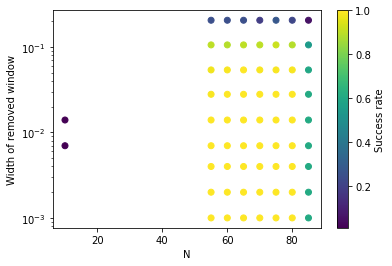

In [237]:
Stat = Successful.groupby(['w','N']).count()['P'].reset_index('w')
Comparison=Sim0.Simulated_periods.loc[Sim0.Simulated_periods.index.isin(list(range(100,200))+list(range(1000,2000)))].groupby(['N']).count()['P']

Stat['P'] = Stat.apply(lambda x:x/Comparison.loc[x.index])['P'].values
Stat = Stat.reset_index()
fig,ax = plt.subplots(1,1)
im=ax.scatter(Stat['N'],Stat['w'],c=(Stat['P']))
ax.set_yscale('log')
fig.colorbar(im).set_label('Success rate')
ax.set_xlabel('N')
ax.set_ylabel('Width of removed window')


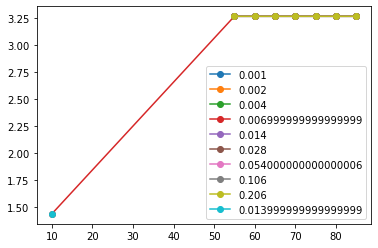

In [238]:
Successful = pd.read_csv('Successful.csv')
for i in Sim0.Simulated_periods.index:
    cut = Successful['run']==i
    Successful.loc[cut,'N']= Sim0.Simulated_periods.loc[i,'N']
for w in pd.unique(Successful['w']):
    cut = Successful[Successful['w']==w]
    median = cut.groupby(cut['N']).median()
    S = cut.groupby(cut['N']).std()
    plt.plot(median.index,median.P,'o-',label=w)
    plt.fill_between(median.index, median.P-S.P,median.P+S.P)
plt.legend()

In [208]:
for w in np.round(np.logspace(-3,np.log10(0.4),10),3):
        try:
            os.mkdir(f'outputs/windows/w_{w}/')
        except:
            pass